In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
from seaborn import set_style
set_style("whitegrid")

Mounted at /content/gdrive


In [ ]:
#this is where we import the libraries
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [ ]:
X_train = pd.read_pickle("/content/gdrive/My Drive/News-Classification-Project-main/ttrain_PCA_cols.pkl")
X_val = pd.read_pickle("/content/gdrive/My Drive/News-Classification-Project-main/tvalid_PCA_cols.pkl")

In [ ]:
X_train.head(5)

,level_0,index,Unnamed: 0,link_col,headline_col,category_col,short_description,authors_col,date_col,headline_cleaned,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0,0,43915,https://www.huffingtonpost.com/entry/noma-rest...,What's on the Menu at the World's Best Restaur...,FOOD & DRINK,"Recently, restaurant Noma in Copenhagen snagge...","Elyse Pasquale, Contributor\r\nFood And Travel...",2012-05-11,menu world best restaurant noma 26 plate,...,-0.000987,-0.003003,0.000044,0.004184,0.001731,-0.004422,0.006115,0.000181,0.000607,0.002784
1,1,1,90079,https://www.huffingtonpost.com/entry/fast-food...,This Fast Food Take On Loose-Leaf Tea Will Des...,FOOD & DRINK,"Move over, Teavana’s $27 express tea-brewing t...",Tiara Chiaramonte,2014-02-25,fast food take loose leaf tea destroy tea bag ...,...,-0.002326,0.001120,0.003012,-0.005429,0.000617,0.000985,0.000703,0.000861,0.001339,-0.004738
2,2,2,4702,https://www.huffingtonpost.com/entry/five-thin...,5 Things To Say Or Do For The Bereaved,WELLNESS,"Chances are you know someone who bereaved, and...","Kristin Meekhof, ContributorAuthor, Writer, Sp...",2017-04-09,5 thing say bereaved,...,-0.003805,-0.019775,0.027521,0.003870,-0.007532,-0.006270,0.010616,0.005585,0.002588,-0.002772
3,3,3,82796,https://www.huffingtonpost.com/entry/donald-tr...,The Wichita State Mascot Looks Like Donald Tru...,SPORTS,SAD.,Juliet Spies-Gans,2016-03-18,wichita state mascot look like donald trump fr...,...,-0.015367,0.005777,-0.000381,0.004152,-0.002038,-0.001284,-0.004593,-0.001270,-0.005527,0.001032
4,4,4,58568,https://www.huffpost.com/entry/stephen-colbert...,Stephen Colbert Gives Kevin McCarthy An X-Rate...,ENTERTAINMENT,You'll never un-hear this one.,Ed Mazza,2022-03-30,stephen colbert give kevin mccarthy x rat new ...,...,0.002751,0.000971,-0.005705,-0.012802,-0.002806,0.001858,-0.003751,0.001781,0.002553,-0.007799


In [ ]:
X_train.drop(['level_0','index','Unnamed: 0'], axis=1, inplace=True) #here we drop the unnecessary columns 
X_val.drop(['level_0','index','Unnamed: 0'], axis=1, inplace=True)   #here we drop the unnecessary columns

In [ ]:
X_train.head(5)

,link_col,headline_col,category_col,short_description,authors_col,date_col,headline_cleaned,short_description_cleaned,cleaned_words,0,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,https://www.huffingtonpost.com/entry/noma-rest...,What's on the Menu at the World's Best Restaur...,FOOD & DRINK,"Recently, restaurant Noma in Copenhagen snagge...","Elyse Pasquale, Contributor\r\nFood And Travel...",2012-05-11,menu world best restaurant noma 26 plate,recently restaurant noma copenhagen snag top s...,menu world best restaurant noma 26 plate recen...,-0.033809,...,-0.000987,-0.003003,0.000044,0.004184,0.001731,-0.004422,0.006115,0.000181,0.000607,0.002784
1,https://www.huffingtonpost.com/entry/fast-food...,This Fast Food Take On Loose-Leaf Tea Will Des...,FOOD & DRINK,"Move over, Teavana’s $27 express tea-brewing t...",Tiara Chiaramonte,2014-02-25,fast food take loose leaf tea destroy tea bag ...,move teavana 27 express tea brewing tumbler,fast food take loose leaf tea destroy tea bag ...,-0.014405,...,-0.002326,0.001120,0.003012,-0.005429,0.000617,0.000985,0.000703,0.000861,0.001339,-0.004738
2,https://www.huffingtonpost.com/entry/five-thin...,5 Things To Say Or Do For The Bereaved,WELLNESS,"Chances are you know someone who bereaved, and...","Kristin Meekhof, ContributorAuthor, Writer, Sp...",2017-04-09,5 thing say bereaved,chance know someone bereave heart may right pl...,5 thing say bereaved chance know someone berea...,-0.019891,...,-0.003805,-0.019775,0.027521,0.003870,-0.007532,-0.006270,0.010616,0.005585,0.002588,-0.002772
3,https://www.huffingtonpost.com/entry/donald-tr...,The Wichita State Mascot Looks Like Donald Tru...,SPORTS,SAD.,Juliet Spies-Gans,2016-03-18,wichita state mascot look like donald trump fr...,sad,wichita state mascot look like donald trump fr...,0.150104,...,-0.015367,0.005777,-0.000381,0.004152,-0.002038,-0.001284,-0.004593,-0.001270,-0.005527,0.001032
4,https://www.huffpost.com/entry/stephen-colbert...,Stephen Colbert Gives Kevin McCarthy An X-Rate...,ENTERTAINMENT,You'll never un-hear this one.,Ed Mazza,2022-03-30,stephen colbert give kevin mccarthy x rat new ...,'ll never un hear one,stephen colbert give kevin mccarthy x rat new ...,-0.013255,...,0.002751,0.000971,-0.005705,-0.012802,-0.002806,0.001858,-0.003751,0.001781,0.002553,-0.007799


In [ ]:
X_train.iloc[:,9:5009].head(5) #pca coloumns

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,-0.033809,-0.005087,-0.040190,-0.002735,-0.027069,-0.039522,-0.033071,0.023806,-0.034682,-0.015998,...,-0.000987,-0.003003,0.000044,0.004184,0.001731,-0.004422,0.006115,0.000181,0.000607,0.002784
1,-0.014405,-0.008542,-0.027513,0.009343,-0.005523,0.007586,-0.024847,-0.026098,-0.036828,-0.005431,...,-0.002326,0.001120,0.003012,-0.005429,0.000617,0.000985,0.000703,0.000861,0.001339,-0.004738
2,-0.019891,-0.026901,0.073917,-0.011592,0.011014,0.023329,0.005143,-0.055344,0.041139,-0.001996,...,-0.003805,-0.019775,0.027521,0.003870,-0.007532,-0.006270,0.010616,0.005585,0.002588,-0.002772
3,0.150104,0.030417,0.043538,-0.047996,-0.051526,-0.027372,-0.049507,0.008858,-0.050094,0.017958,...,-0.015367,0.005777,-0.000381,0.004152,-0.002038,-0.001284,-0.004593,-0.001270,-0.005527,0.001032
4,-0.013255,-0.012022,-0.010501,-0.012668,-0.012291,-0.019474,-0.008070,0.032625,0.015008,-0.004549,...,0.002751,0.000971,-0.005705,-0.012802,-0.002806,0.001858,-0.003751,0.001781,0.002553,-0.007799


In [ ]:
X_train["category_col"].unique() #these are unique list of categories in our train_train data set


array(['FOOD & DRINK', 'WELLNESS', 'SPORTS', 'ENTERTAINMENT', 'POLITICS',
       'TRAVEL', 'STYLE & BEAUTY', 'PARENTING', 'BLACK VOICES',
       'BUSINESS', 'QUEER VOICES', 'WORLD NEWS'], dtype=object)

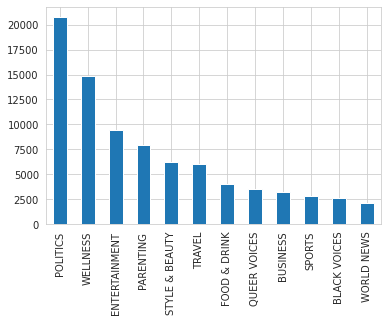

In [ ]:
X_train['category_col'].value_counts().plot(kind='bar') #here we plot to see the  barplots of the categories present in our training set.

In [ ]:
y_train=pd.Series(X_train['category_col']).values
y_valid=pd.Series(X_val['category_col']).values
[y_train.shape,y_valid.shape,X_train.iloc[:,9:5009].shape] # this are the shape of our pca_training set and validation target variable data 


[(83720,), (20931,), (83720, 5000)]

In [ ]:
X_train_ho_pca, X_test_ho_pca, y_train_ho, y_test_ho = train_test_split(X_train.iloc[:,9:5009], y_train, test_size=0.20, 
                                                            shuffle=True, random_state=2) #creating a hold out set
clf = LogisticRegression(C=20, multi_class= 'multinomial', max_iter=3500)
clf.fit(X_train_ho_pca, y_train_ho) 
# Here we run our first logistic regression model, where the regression is done over multinomial style instead y=a+mx (which is one vs rest),
#our parameter here is C=20, the C parameter denotes the strength of our regularization on the penalty that we impose on the log-loss function LF. 
#Later we will attempt to find best C value for classification model OVR and Multinomial.   

LogisticRegression(C=20, max_iter=3500, multi_class='multinomial')

In [ ]:
X_test_ho_pca.head(3) #sanity check of the X_test PCA columns

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
29418,0.044246,-0.000453,-0.042342,0.022138,0.03307,-0.011079,0.009402,-0.020561,0.006488,-0.020837,...,0.001610,-0.002758,0.002093,-0.007273,-0.000507,-0.004286,0.003190,0.000169,0.002652,-0.001574
29584,-0.007159,-0.035574,0.019174,0.054900,0.04005,0.155545,-0.007769,0.045256,-0.037110,-0.012800,...,-0.000442,0.003563,0.003503,-0.000608,0.004895,0.000966,-0.000070,0.003281,0.000938,-0.004687
3965,0.018995,-0.007743,-0.039141,0.018552,-0.01088,0.000726,0.002936,-0.027359,-0.005529,-0.001875,...,-0.000416,0.001483,0.001591,0.000481,-0.003319,-0.000461,0.001779,0.000095,0.002940,-0.001342


In [ ]:
y_test_ho # to check whether y_test giving us the categories that we wanted

array(['POLITICS', 'WELLNESS', 'POLITICS', ..., 'POLITICS', 'POLITICS',
       'ENTERTAINMENT'], dtype=object)

In [ ]:
labels=['FOOD & DRINK', 'WELLNESS', 'SPORTS', 'ENTERTAINMENT', 'POLITICS',
       'TRAVEL', 'STYLE & BEAUTY', 'PARENTING', 'BLACK VOICES',
       'BUSINESS', 'QUEER VOICES', 'WORLD NEWS']
labels.sort(reverse=False)
labels  # in the confusion matrix picture we wanted have our labeling done with alphabatical order, so we created a list of alphabatically ordered labels.      

['BLACK VOICES',
 'BUSINESS',
 'ENTERTAINMENT',
 'FOOD & DRINK',
 'PARENTING',
 'POLITICS',
 'QUEER VOICES',
 'SPORTS',
 'STYLE & BEAUTY',
 'TRAVEL',
 'WELLNESS',
 'WORLD NEWS']

Train accuracy: 0.91515
Test accuracy: 0.77198

Test confusion_matrix


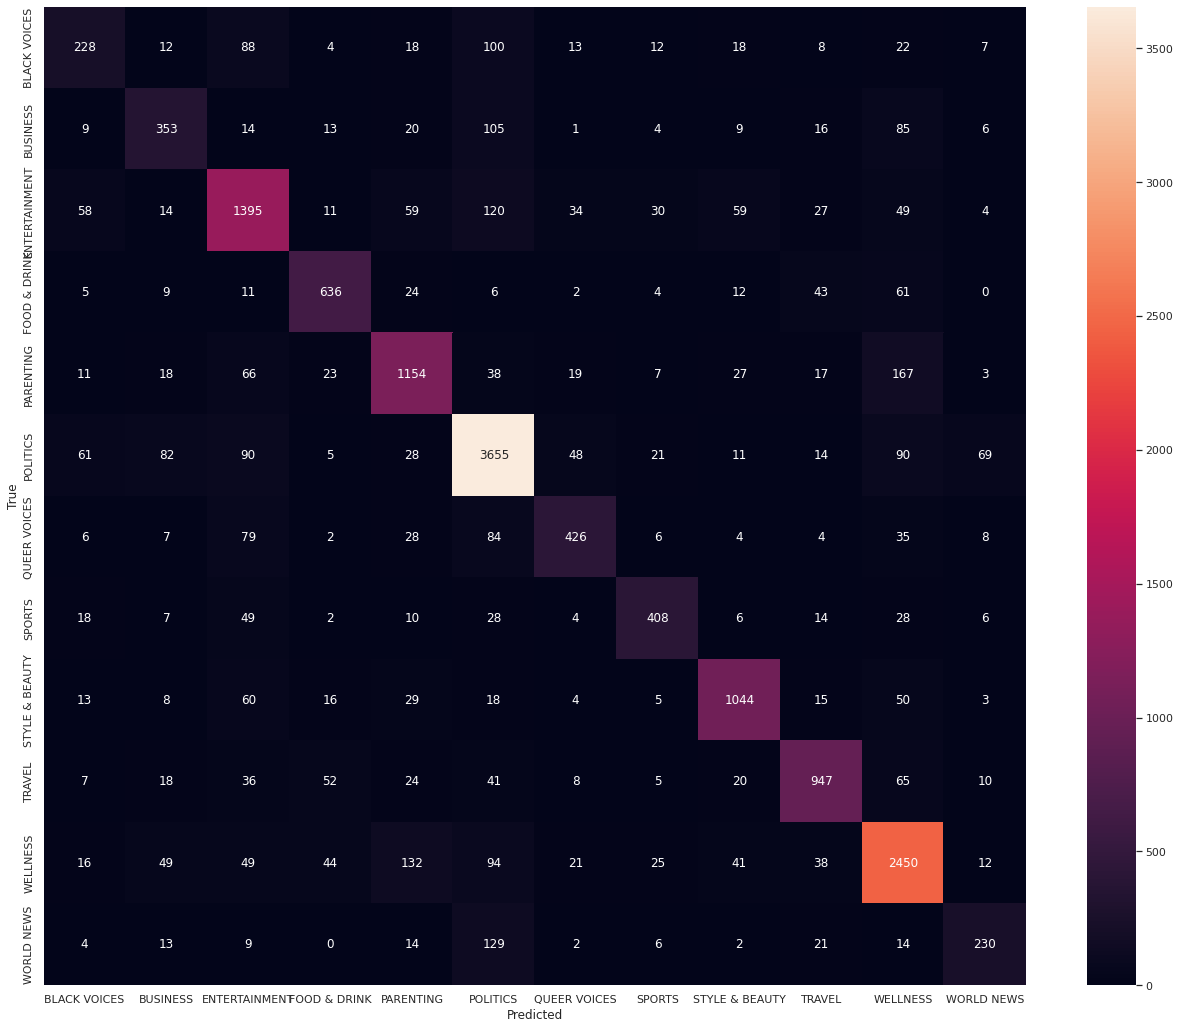

In [ ]:

y_pred_ho = clf.predict(X_test_ho_pca) # Predictions
y_true_ho = y_test_ho # True values

# Measure accuracy
print("Train accuracy:", np.round(accuracy_score(y_train_ho, 
                                                 clf.predict(X_train_ho_pca)), 5))
print("Test accuracy:", np.round(accuracy_score(y_true_ho, y_pred_ho), 5))

# Make the confusion matrix
cf_matrix = confusion_matrix(y_true_ho, y_pred_ho)
print("\nTest confusion_matrix")
sns.set(rc={'figure.figsize':(22,18)})
ax= plt.subplot()
hm=sns.heatmap(cf_matrix, fmt="g", annot=True,ax=ax)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
plt.show()
#Here we can see that our test accuracy and train accuracy are quite a distance apart for our model "clf", probably due to overfitting of our training data and presence of noise.

In [ ]:
print(classification_report(y_test_ho, y_pred_ho))
#This is the classification report on our model clf 

                precision    recall  f1-score   support

  BLACK VOICES       0.52      0.43      0.47       530
      BUSINESS       0.60      0.56      0.58       635
 ENTERTAINMENT       0.72      0.75      0.73      1860
  FOOD & DRINK       0.79      0.78      0.78       813
     PARENTING       0.75      0.74      0.75      1550
      POLITICS       0.83      0.88      0.85      4174
  QUEER VOICES       0.73      0.62      0.67       689
        SPORTS       0.77      0.70      0.73       580
STYLE & BEAUTY       0.83      0.83      0.83      1265
        TRAVEL       0.81      0.77      0.79      1233
      WELLNESS       0.79      0.82      0.80      2971
    WORLD NEWS       0.64      0.52      0.57       444

      accuracy                           0.77     16744
     macro avg       0.73      0.70      0.71     16744
  weighted avg       0.77      0.77      0.77     16744



In [ ]:
clf1 = LogisticRegression(C=10, multi_class= 'ovr', max_iter=1000)
clf1.fit(X_train_ho_pca, y_train_ho)
# So we look at a different model with ovr(one-vs-rest) as our choices as the probabilities. Again here the default penalty system is l^2 
# and inverse regularization constant is C=10. 


LogisticRegression(C=10, max_iter=1000, multi_class='ovr')

Train accuracy: 0.87605
Test accuracy: 0.78852

Test confusion_matrix


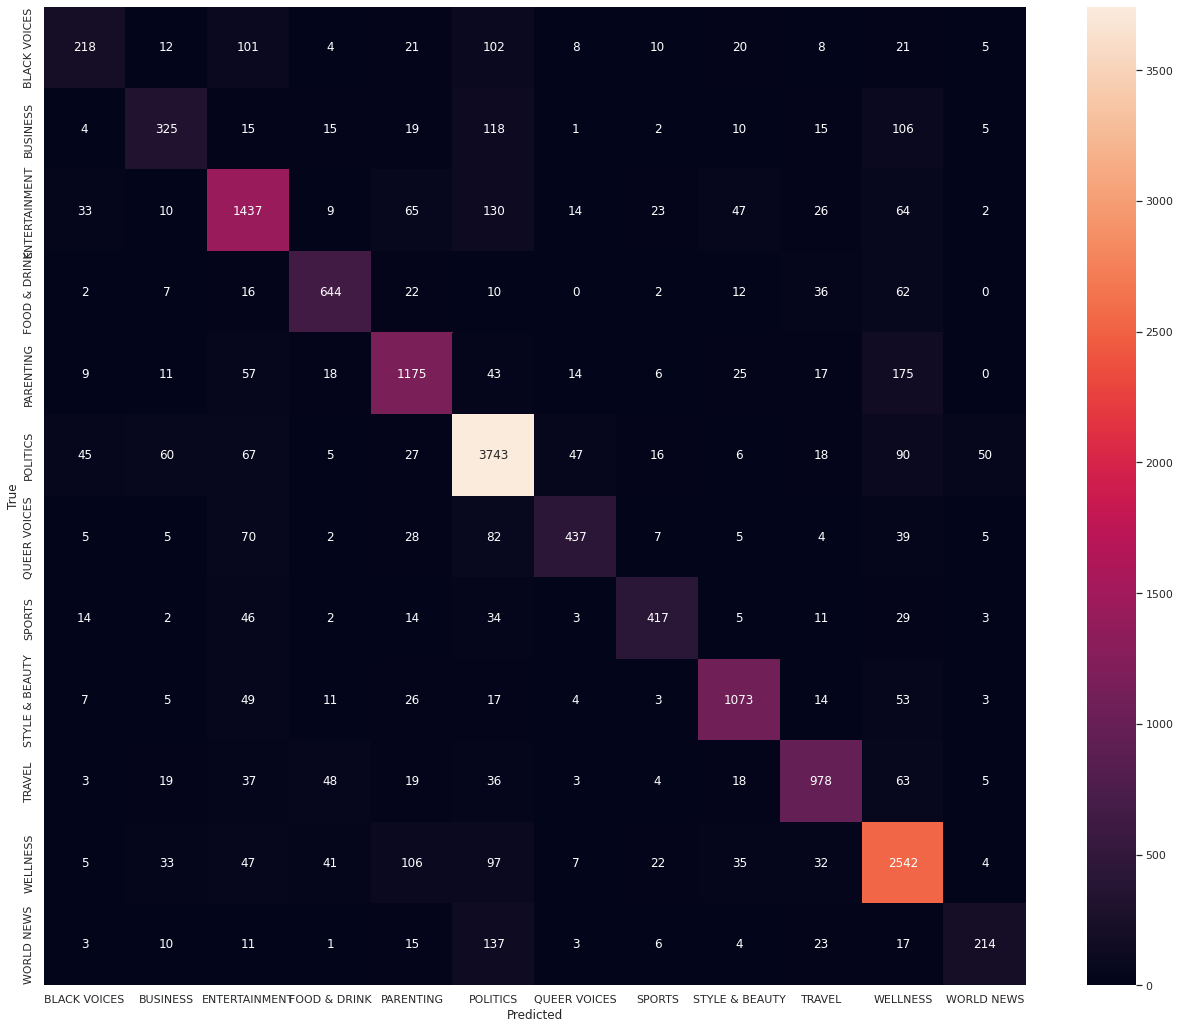

In [ ]:
y_pred_ho = clf1.predict(X_test_ho_pca) # Predictions
y_true_ho = y_test_ho # True values

# Measure accuracy
print("Train accuracy:", np.round(accuracy_score(y_train_ho, 
                                                 clf1.predict(X_train_ho_pca)), 5))
print("Test accuracy:", np.round(accuracy_score(y_true_ho, y_pred_ho), 5))

# Make the confusion matrix
cf_matrix = confusion_matrix(y_true_ho, y_pred_ho)
print("\nTest confusion_matrix")
sns.set(rc={'figure.figsize':(22,18)})
ax= plt.subplot()
hm=sns.heatmap(cf_matrix, fmt="g", annot=True,ax=ax)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
plt.show()
#We can see here the train accuracy and test accuracy are much more closer, so probably the better model to choose with those parameters.

In [ ]:
print(classification_report(y_test_ho, y_pred_ho))
#this is the classification report on the model clf1.

                precision    recall  f1-score   support

  BLACK VOICES       0.63      0.41      0.50       530
      BUSINESS       0.65      0.51      0.57       635
 ENTERTAINMENT       0.74      0.77      0.75      1860
  FOOD & DRINK       0.81      0.79      0.80       813
     PARENTING       0.76      0.76      0.76      1550
      POLITICS       0.82      0.90      0.86      4174
  QUEER VOICES       0.81      0.63      0.71       689
        SPORTS       0.81      0.72      0.76       580
STYLE & BEAUTY       0.85      0.85      0.85      1265
        TRAVEL       0.83      0.79      0.81      1233
      WELLNESS       0.78      0.86      0.82      2971
    WORLD NEWS       0.72      0.48      0.58       444

      accuracy                           0.79     16744
     macro avg       0.77      0.71      0.73     16744
  weighted avg       0.79      0.79      0.78     16744



i*20% done
i*20% done
i*20% done
i*20% done


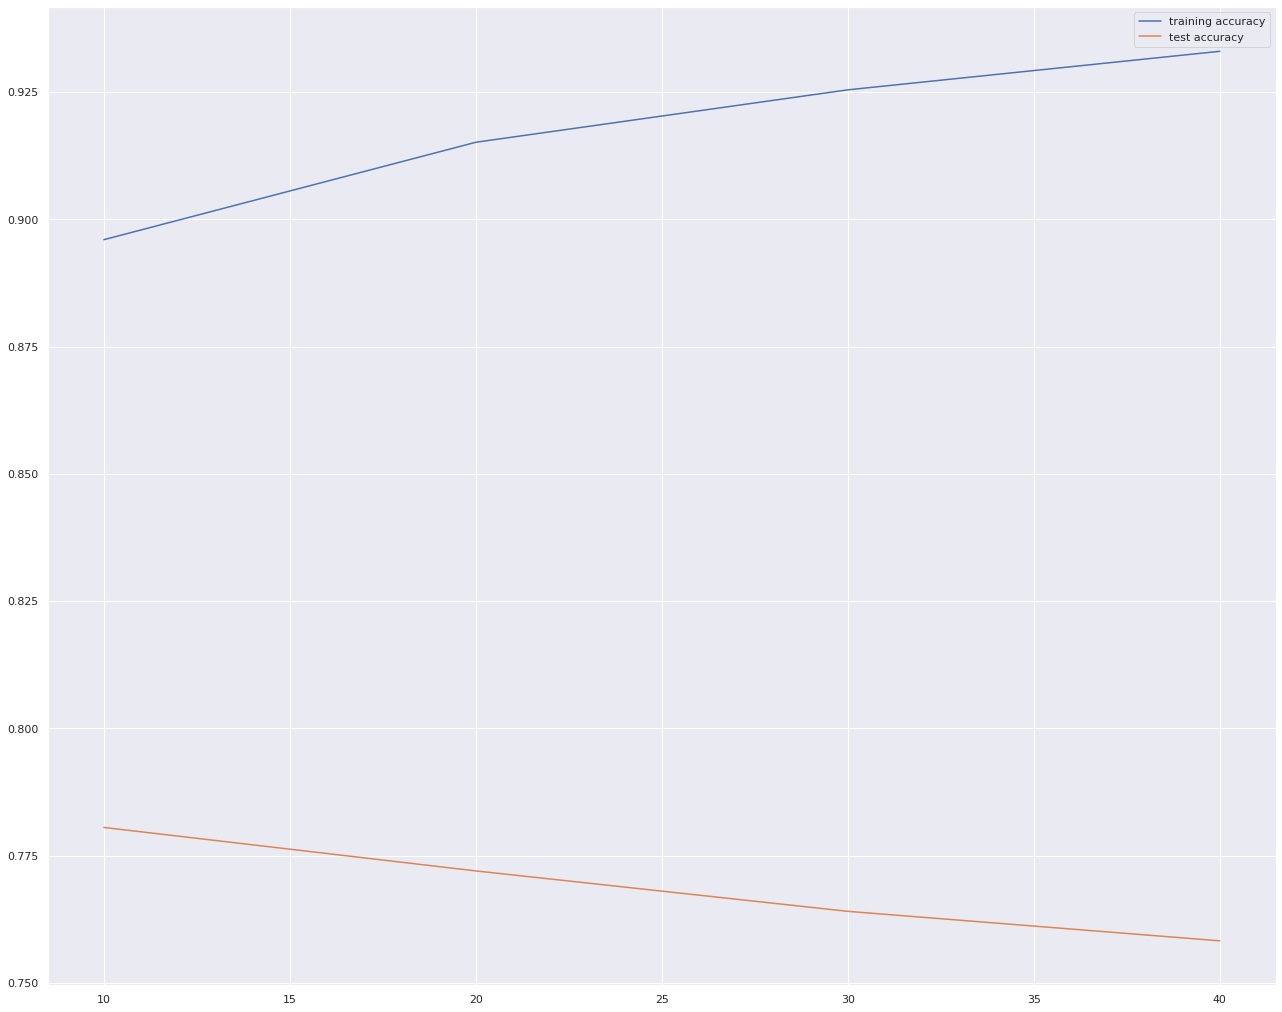

In [ ]:
training_accuracy = []
test_accuracy = []
 #try c values from 10 to 50:
c_settings = np.arange(10, 50, 10)
for i in c_settings:
     #build the model
    clfs = LogisticRegression(C=i, multi_class='multinomial', max_iter=1000)
    clfs.fit(X_train_ho_pca, y_train_ho)
     #record training set accuracy
    training_accuracy.append(clfs.score(X_train_ho_pca, y_train_ho))
    # record generalization accuracy
    test_accuracy.append(clfs.score(X_test_ho_pca, y_test_ho))
    print("i*20% done")
plt.plot(c_settings, training_accuracy, label="training accuracy")
plt.plot(c_settings, test_accuracy, label="test accuracy")
plt.legend()
#In this code we wanted to see which C value (in the range 10,20,30,40,50) is best among the multinomial model so that the accuracy between train_ho set and the test_ho set is the smallest. 

In [ ]:
clf2 = LogisticRegression(C=1, multi_class= 'multinomial', max_iter=1000)
clf2.fit(X_train_ho_pca, y_train_ho)
#By looking at the graph above we decided to have much more smaller value of C (=1, which is the default value ) with multinomial method

LogisticRegression(C=1, max_iter=1000, multi_class='multinomial')

Train accuracy: 0.82615
Test accuracy: 0.78285

Test confusion_matrix


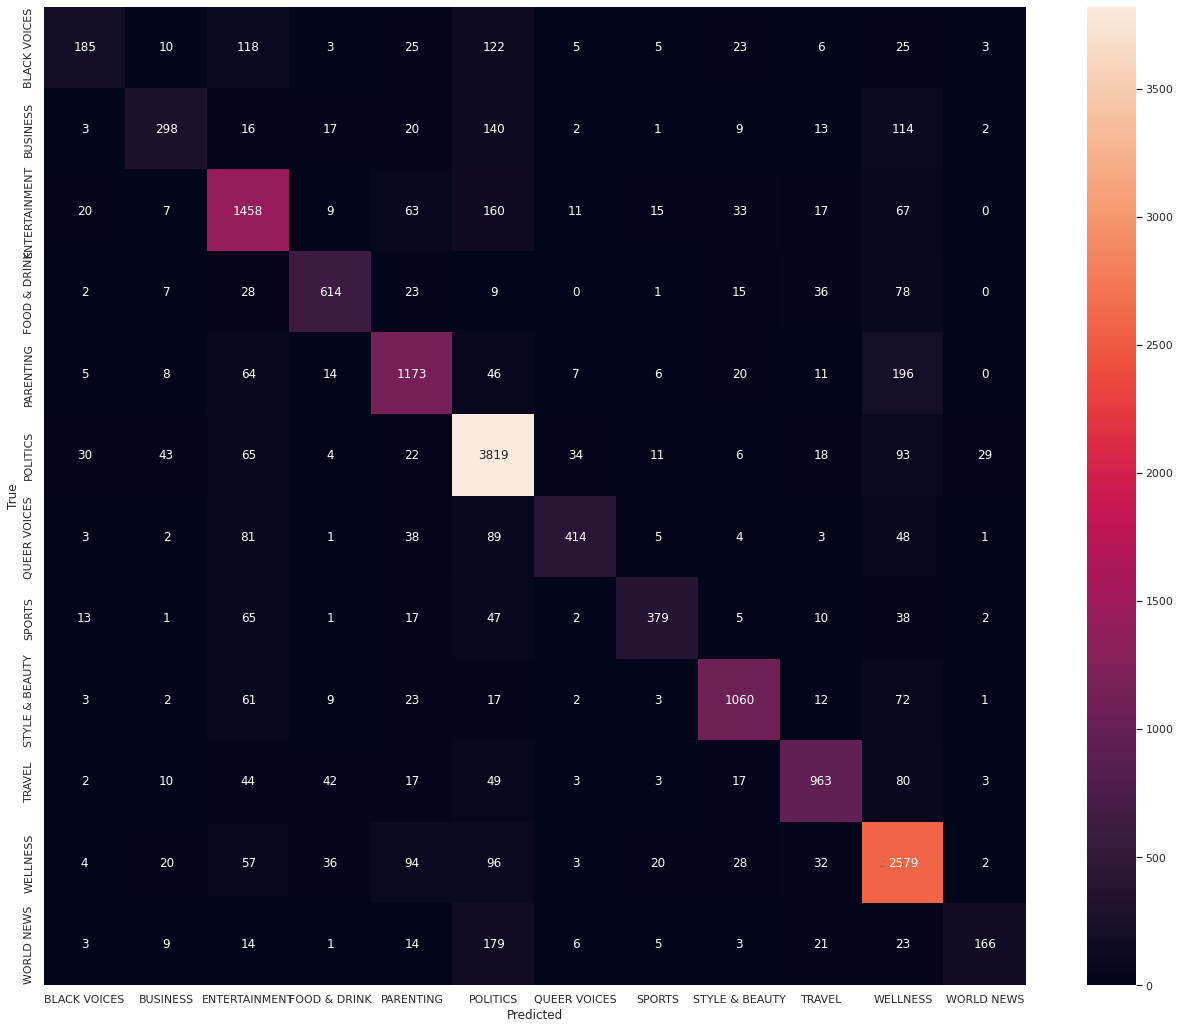

                precision    recall  f1-score   support

  BLACK VOICES       0.68      0.35      0.46       530
      BUSINESS       0.71      0.47      0.57       635
 ENTERTAINMENT       0.70      0.78      0.74      1860
  FOOD & DRINK       0.82      0.76      0.79       813
     PARENTING       0.77      0.76      0.76      1550
      POLITICS       0.80      0.91      0.85      4174
  QUEER VOICES       0.85      0.60      0.70       689
        SPORTS       0.83      0.65      0.73       580
STYLE & BEAUTY       0.87      0.84      0.85      1265
        TRAVEL       0.84      0.78      0.81      1233
      WELLNESS       0.76      0.87      0.81      2971
    WORLD NEWS       0.79      0.37      0.51       444

      accuracy                           0.78     16744
     macro avg       0.79      0.68      0.72     16744
  weighted avg       0.78      0.78      0.78     16744



In [ ]:
y_pred_ho = clf2.predict(X_test_ho_pca) # Predictions
y_true_ho = y_test_ho # True values

# Measure accuracy
print("Train accuracy:", np.round(accuracy_score(y_train_ho, 
                                                 clf2.predict(X_train_ho_pca)), 5))
print("Test accuracy:", np.round(accuracy_score(y_true_ho, y_pred_ho), 5))

# Make the confusion matrix
cf_matrix = confusion_matrix(y_true_ho, y_pred_ho)
print("\nTest confusion_matrix")
sns.set(rc={'figure.figsize':(22,18)})
ax= plt.subplot()
hm=sns.heatmap(cf_matrix, fmt="g", annot=True,ax=ax)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
plt.show()
# we also print the classification report for our model clf2 
print(classification_report(y_test_ho, y_pred_ho))
# we can see here we have considerably minimized the difference between the train_ho accuarcy and the test_ho accuracy, but the accuracy of the whole model
#dropped!


i.20% done
i.20% done
i.20% done
i.20% done


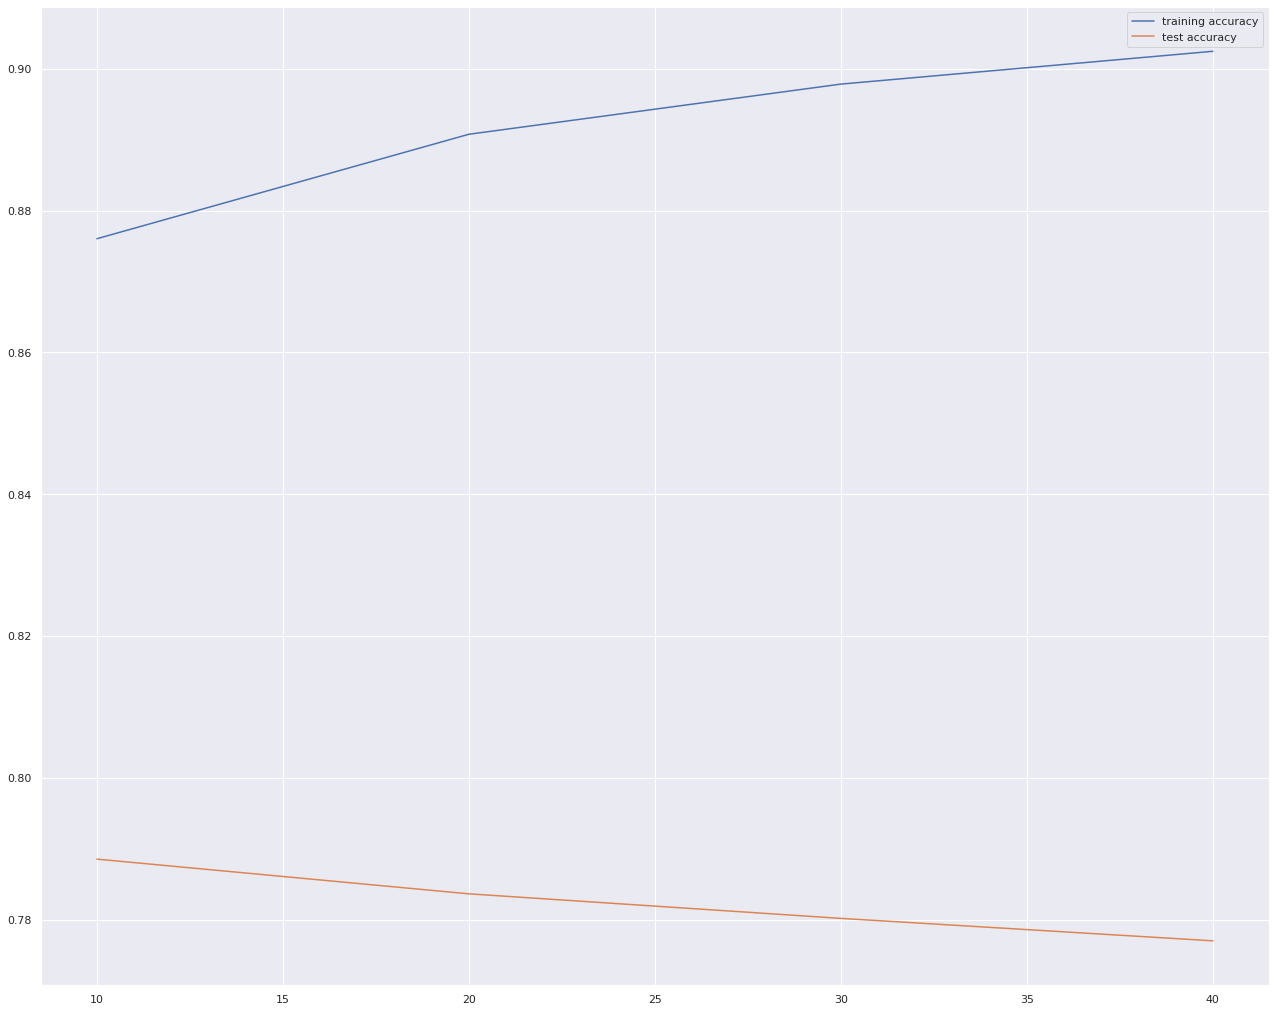

In [ ]:
training_accuracy = []
test_accuracy = []
 #try c values from 10 to 50:
c_settings = np.arange(10, 50, 10)
for i in c_settings:
     #build the model
    clfs = LogisticRegression(C=i, multi_class='ovr', max_iter=1500)
    clfs.fit(X_train_ho_pca, y_train_ho)
     #record training set accuracy
    training_accuracy.append(clfs.score(X_train_ho_pca, y_train_ho))
    # record generalization accuracy
    test_accuracy.append(clfs.score(X_test_ho_pca, y_test_ho))
    print("i.20% done")
plt.plot(c_settings, training_accuracy, label="training accuracy")
plt.plot(c_settings, test_accuracy, label="test accuracy")
plt.legend()
#Here again just like last time we wanted to see which C value is the among some finite values with "OVR" type classification and saw that 
#the difference between the train_ho and test_ho accuracies are increasing as we increase the C value.

In [ ]:
clf4 = LogisticRegression(C=0.5, multi_class= 'ovr', max_iter=1000)
clf4.fit(X_train_ho_pca, y_train_h
#Here is an attempt to see whether by signaficant lowering of the C value improve our accuracy difference by keeping the higher accuracy level.

LogisticRegression(C=0.5, max_iter=1000, multi_class='ovr')

Train accuracy: 0.78555
Test accuracy: 0.75812

Test confusion_matrix


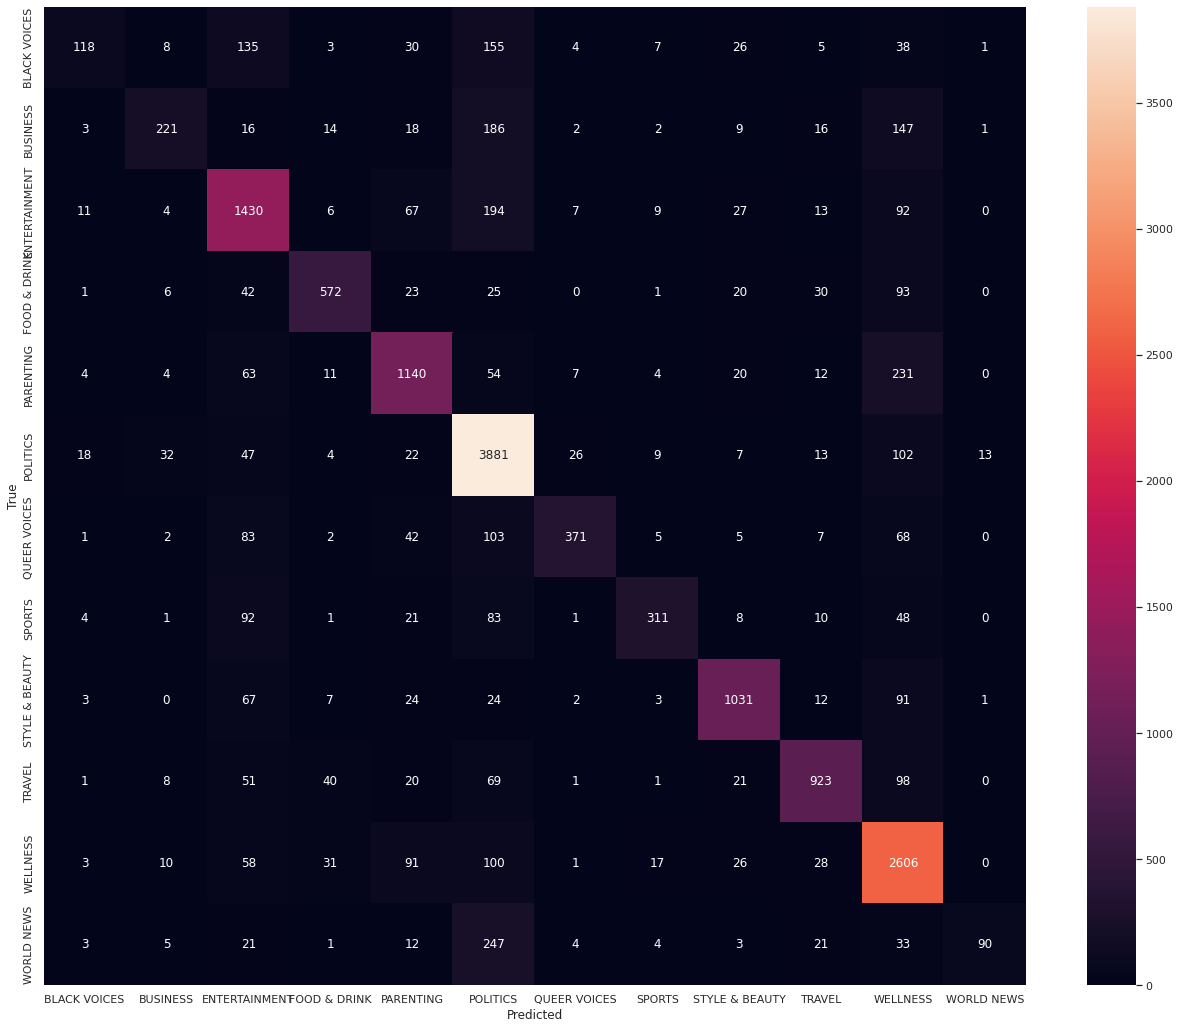

                precision    recall  f1-score   support

  BLACK VOICES       0.69      0.22      0.34       530
      BUSINESS       0.73      0.35      0.47       635
 ENTERTAINMENT       0.68      0.77      0.72      1860
  FOOD & DRINK       0.83      0.70      0.76       813
     PARENTING       0.75      0.74      0.75      1550
      POLITICS       0.76      0.93      0.84      4174
  QUEER VOICES       0.87      0.54      0.67       689
        SPORTS       0.83      0.54      0.65       580
STYLE & BEAUTY       0.86      0.82      0.84      1265
        TRAVEL       0.85      0.75      0.79      1233
      WELLNESS       0.71      0.88      0.79      2971
    WORLD NEWS       0.85      0.20      0.33       444

      accuracy                           0.76     16744
     macro avg       0.78      0.62      0.66     16744
  weighted avg       0.77      0.76      0.74     16744



In [ ]:
y_pred_ho = clf4.predict(X_test_ho_pca) # Predictions
y_true_ho = y_test_ho # True values

# Measure accuracy
print("Train accuracy:", np.round(accuracy_score(y_train_ho, 
                                                 clf4.predict(X_train_ho_pca)), 5))
print("Test accuracy:", np.round(accuracy_score(y_true_ho, y_pred_ho), 5))

# Make the confusion matrix
cf_matrix = confusion_matrix(y_true_ho, y_pred_ho)
print("\nTest confusion_matrix")
sns.set(rc={'figure.figsize':(22,18)})
ax= plt.subplot()
hm=sns.heatmap(cf_matrix, fmt="g", annot=True,ax=ax)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
plt.show()
# make the classification report of model clf4
print(classification_report(y_test_ho, y_pred_ho))
#We see that although the difference of accuracy is low but the overall accuracy dropped.

Valid accuracy: 0.78649

Valid confusion_matrix


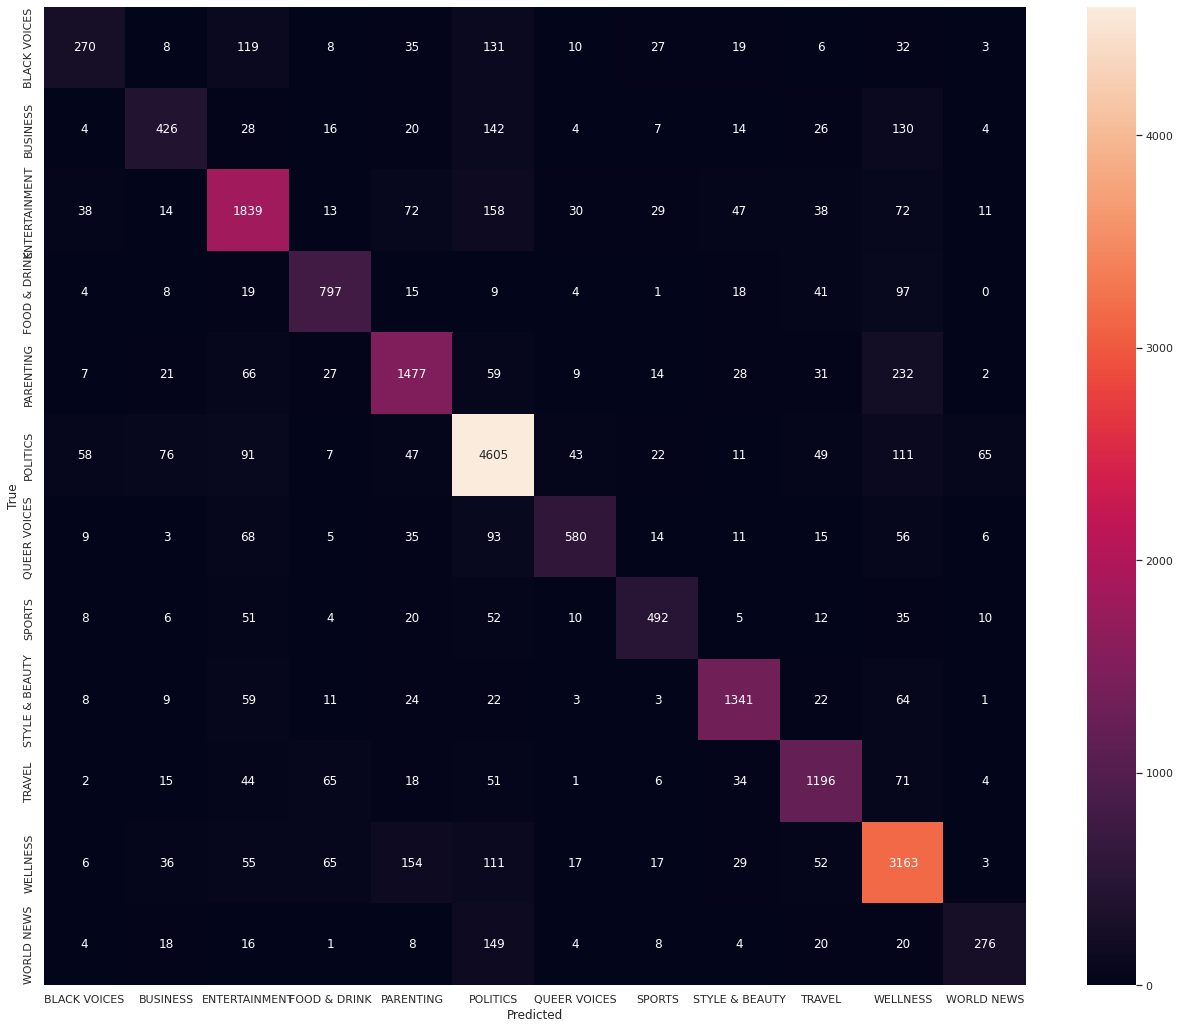

                precision    recall  f1-score   support

  BLACK VOICES       0.65      0.40      0.50       668
      BUSINESS       0.67      0.52      0.58       821
 ENTERTAINMENT       0.75      0.78      0.76      2361
  FOOD & DRINK       0.78      0.79      0.78      1013
     PARENTING       0.77      0.75      0.76      1973
      POLITICS       0.82      0.89      0.86      5185
  QUEER VOICES       0.81      0.65      0.72       895
        SPORTS       0.77      0.70      0.73       705
STYLE & BEAUTY       0.86      0.86      0.86      1567
        TRAVEL       0.79      0.79      0.79      1507
      WELLNESS       0.77      0.85      0.81      3708
    WORLD NEWS       0.72      0.52      0.60       528

      accuracy                           0.79     20931
     macro avg       0.76      0.71      0.73     20931
  weighted avg       0.78      0.79      0.78     20931



In [ ]:
#So by looking at the models the best model is:
#clf1 = LogisticRegression(C=10, multi_class= 'ovr', max_iter=1000)
#clf1.fit(X_train_ho_pca, y_train_ho) 
y_pred_val = clf1.predict(X_val.iloc[:,9:5009])
y_true_val=y_valid
print("Valid accuracy:", np.round(accuracy_score(y_true_val, y_pred_val), 5))

# Make the confusion matrix
cf_matrix = confusion_matrix(y_true_val, y_pred_val)
print("\nValid confusion_matrix")
sns.set(rc={'figure.figsize':(22,20)})
ax= plt.subplot()
hm=sns.heatmap(cf_matrix, fmt="g", annot=True,ax=ax)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
plt.show()
#The classification report on validation set of the model clf1
print(classification_report(y_true_val, y_pred_val))
